In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##For future reference as to how to add watermarks 
'''
    # Add watermark all over the plot
    # Create a grid of watermark positions
    x_lim = plt.gca().get_xlim()
    y_lim = plt.gca().get_ylim()
    for x in np.linspace(x_lim[0], x_lim[1], num=10):
        for y in np.linspace(y_lim[0], y_lim[1], num=10):
            plt.text(x, y, 'mdaniels33', fontsize=10, color='gray', alpha=0.15, ha='center', va='center', rotation=30)
'''

"\n    # Add watermark all over the plot\n    # Create a grid of watermark positions\n    x_lim = plt.gca().get_xlim()\n    y_lim = plt.gca().get_ylim()\n    for x in np.linspace(x_lim[0], x_lim[1], num=10):\n        for y in np.linspace(y_lim[0], y_lim[1], num=10):\n            plt.text(x, y, 'mdaniels33', fontsize=10, color='gray', alpha=0.15, ha='center', va='center', rotation=30)\n"

In [3]:
# Functions for PCA 
def compute_mean(data):
    m = data.shape[0]
    mu = np.mean(data, axis=0)
    return mu

def compute_covariance_matrix(data):
    m = data.shape[0]
    mu = compute_mean(data)
    centered_data = data - mu
    C = np.dot(centered_data.T, centered_data) / m
    return C

def get_top_eigenvectors(cov_matrix, num_vectors=2):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:num_vectors]]
    top_eigenvalues = eigenvalues[sorted_indices[:num_vectors]]
    return top_eigenvectors, top_eigenvalues

def compute_reduced_representation(data):
    mean_vector = compute_mean(data)
    centered_data = data - mean_vector
    cov_matrix = compute_covariance_matrix(data)
    eigenvectors, eigenvalues = get_top_eigenvectors(cov_matrix, num_vectors=2)
    reduced_representation = np.dot(centered_data, eigenvectors) / np.sqrt(eigenvalues)
    return reduced_representation

def plot_pca_2d(reduced_data, food_items, save_path, plot_title):
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

    # Add food item labels to the points
    for i, food in enumerate(food_items):
        plt.text(reduced_data[i, 0], reduced_data[i, 1], food)


    plt.title(plot_title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    
    # Save the figure to the specified path
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

In [4]:
##Question 1: 

In [5]:
data = pd.read_csv('data/food-consumption.csv')

In [6]:
food_data = data.iloc[:, 1:]
country_data = data.iloc[:,0]

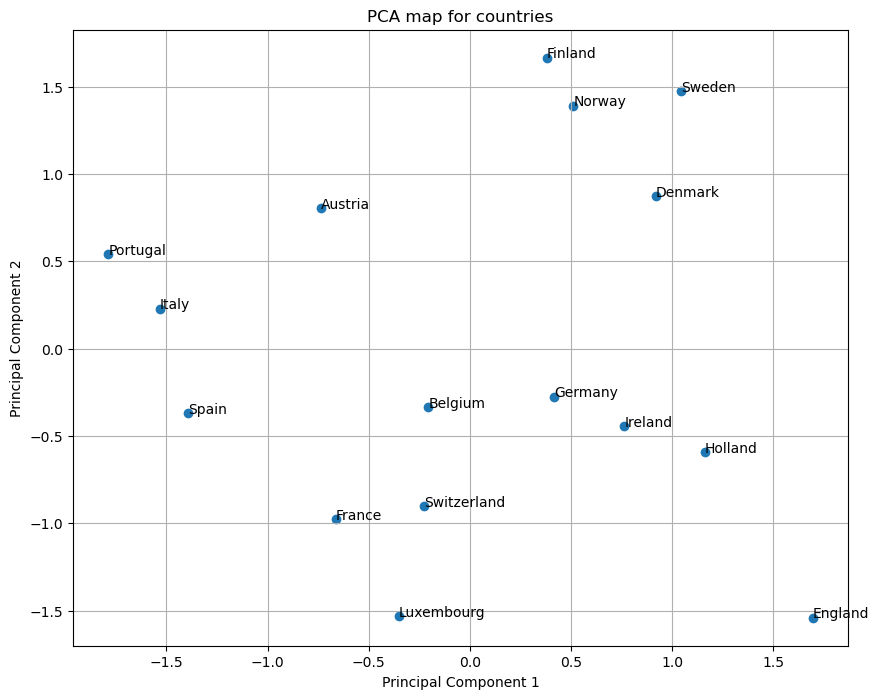

In [7]:
reduced_rep = compute_reduced_representation(food_data)
plot_pca_2d(reduced_rep, country_data, "PCAplot1", "PCA map for countries")

In [8]:
##Question 2

In [9]:
# Step 1: Set 'Country' as the index to avoid transposing the 'Country' column
data.set_index('Country', inplace=True)

# Step 2: Transpose the DataFrame so that food items become rows and countries become columns
transposed_data = data.T

# Step 3: Reset the index so that the food items are properly represented as a column
transposed_data = transposed_data.reset_index()

# Rename the index column to 'Food'
transposed_data.rename(columns={'index': 'Food'}, inplace=True)

data2 = transposed_data

In [10]:
country_data2 = data2.iloc[:, 1:]
food_data2 = data2.iloc[:,0]

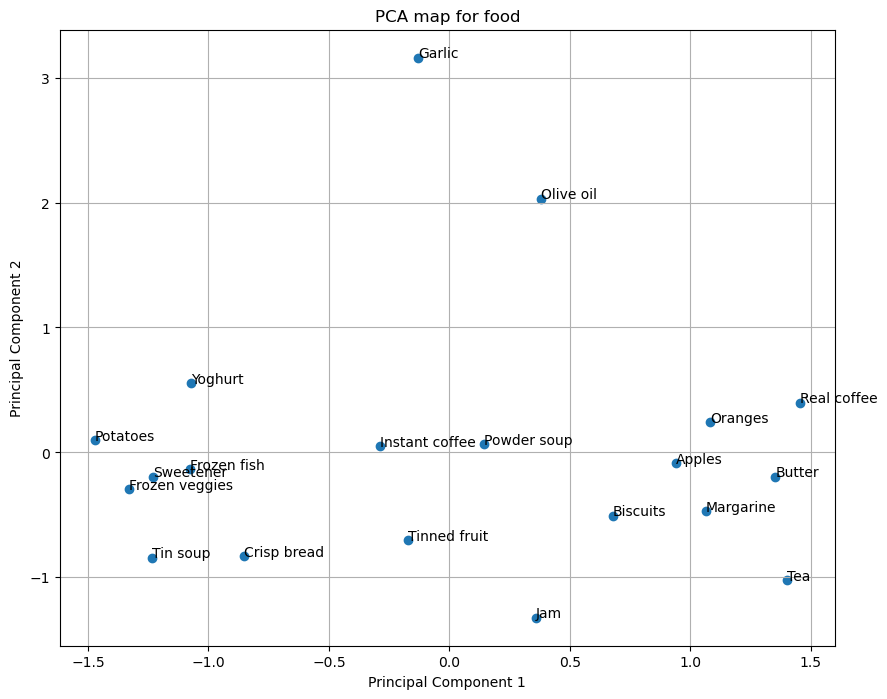

In [11]:
reduced_rep2 = compute_reduced_representation(country_data2)
plot_pca_2d(reduced_rep2, food_data2, "PCAplot2", "PCA map for food")